<a href="https://colab.research.google.com/github/azizbahrululum76/projecttodatascientist/blob/main/Sentimen_Analysis_Tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("tiktok_google_play_reviews.csv")
df_head = df.head()
df_info = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes,
    "Non-Null Count": df.notnull().sum(),
    "Null Count": df.isnull().sum()
})

df_describe = df.describe().T
df_null_count = pd.DataFrame(df.isnull().sum(), columns=["Null Count"])

# Menampilkan hasil
print("Data Head:")
display(df_head)

print("\nData Info:")
display(df_info)




Data Head:


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5.0,0.0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5.0,0.0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1.0,0.0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5.0,0.0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5.0,0.0,NaN,2022-11-29 21:54:21,NaN,NaN



Data Info:


,Column,Data Type,Non-Null Count,Null Count
reviewId,reviewId,object,123451,0
userName,userName,object,123451,0
userImage,userImage,object,123451,0
content,content,object,123438,13
score,score,float64,123450,1
thumbsUpCount,thumbsUpCount,float64,123450,1
reviewCreatedVersion,reviewCreatedVersion,object,89553,33898
at,at,object,123450,1
replyContent,replyContent,object,138,123313
repliedAt,repliedAt,object,138,123313


In [4]:
df = df.drop(['userImage', 'reviewId'], axis=1)

df['replyContent'].fillna('No reply', inplace=True)
df['repliedAt'].fillna('No reply date', inplace=True)

df['at'] = pd.to_datetime(df['at'])
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')


<ipython-input-4-bb7a74b53521>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['replyContent'].fillna('No reply', inplace=True)
<ipython-input-4-bb7a74b53521>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

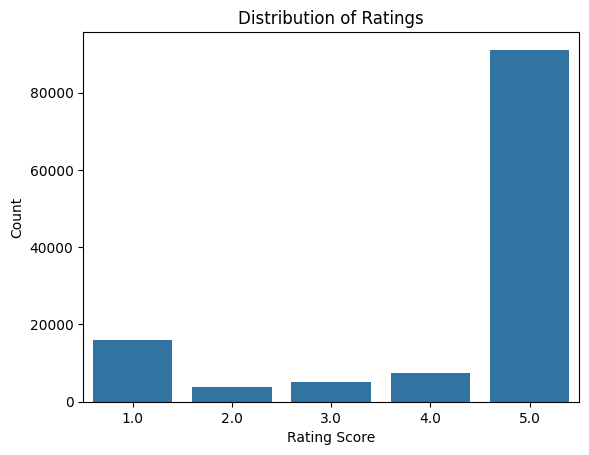

Average Rating: 4.25


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Rating
sns.countplot(x='score', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

# Rata-Rata Rating
average_score = df['score'].mean()
print(f"Average Rating: {average_score:.2f}")


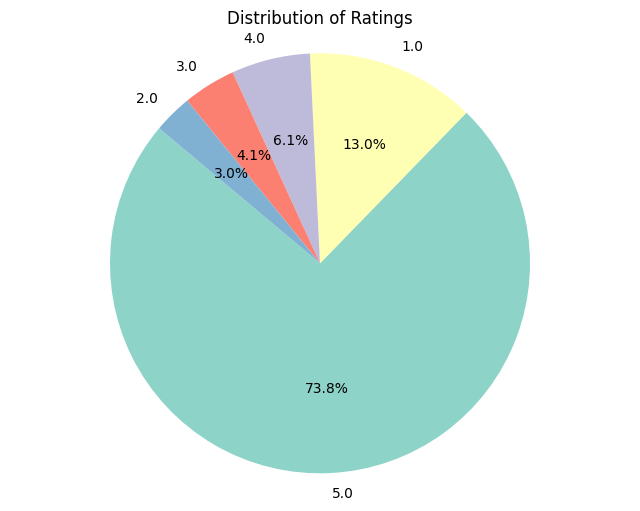

Average Rating: 4.25


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

score_counts = df['score'].value_counts()
labels = score_counts.index
sizes = score_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

average_score = df['score'].mean()
print(f"Average Rating: {average_score:.2f}")


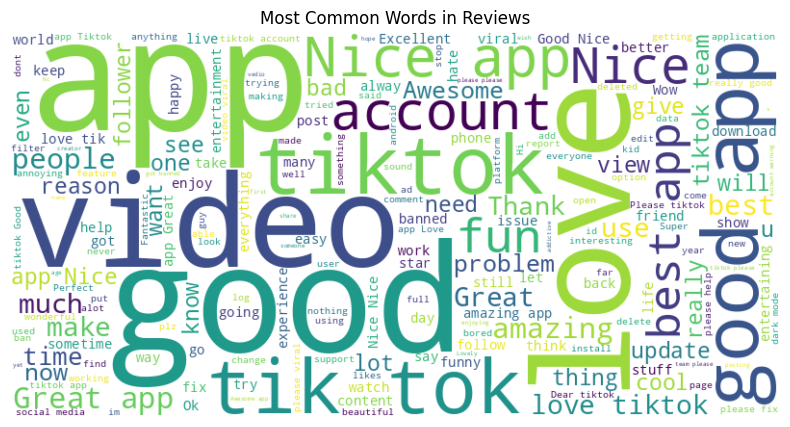

In [7]:
from wordcloud import WordCloud

# Membuat wordcloud untuk kolom 'content'
text = ' '.join(review for review in df['content'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


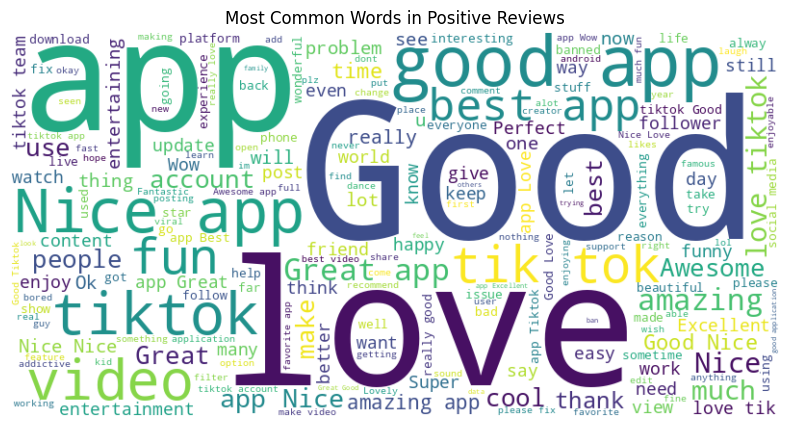

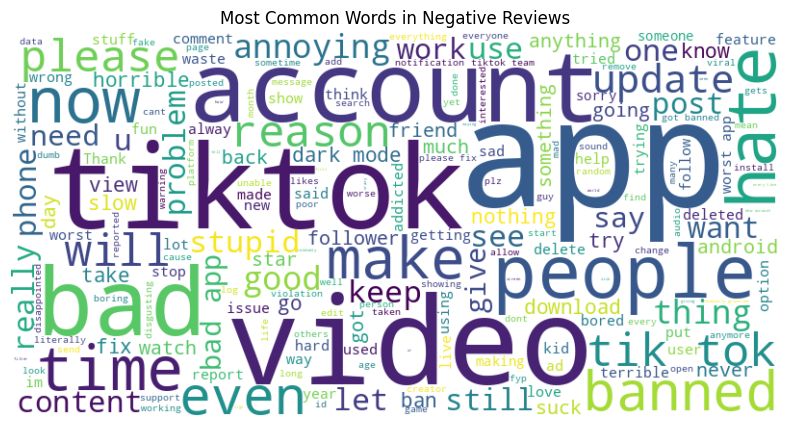

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mengganti nilai NaN di kolom 'content' dengan string kosong
df['content'] = df['content'].fillna('')

# Fungsi untuk menentukan sentimen dari komentar
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Menambahkan kolom sentimen ke dataframe
df['sentiment'] = df['content'].apply(get_sentiment)

# Memisahkan komentar positif dan negatif
positive_reviews = df[df['sentiment'] == 'Positive']
negative_reviews = df[df['sentiment'] == 'Negative']

# Membuat word cloud untuk komentar positif
positive_text = ' '.join(review for review in positive_reviews['content'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

# Membuat word cloud untuk komentar negatif
negative_text = ' '.join(review for review in negative_reviews['content'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()
